<b><h2>Importing libraries</b></h2>

In [1]:
from os import listdir
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,InputLayer
from tensorflow.keras.models import Model ,Sequential
import datetime
from tensorflow.keras.initializers import he_uniform

In [2]:
import warnings
warnings.filterwarnings('ignore')

<b><h2>Reading Data</b></h2>

In [3]:
a_traincsv = listdir('training/')

with open("train.psv","wb") as fout:

  for i,csv in enumerate(a_traincsv):
      
    if i == 0:
      with open('training/' + csv, "rb") as f:
          fout.write(f.read())
      
    if i <10000:
     with open('training/' + csv, "rb") as f:
       next(f)
       fout.write(f.read())

<b><h2>Descriptive Statistics of data</b></h2>

In [4]:
data = pd.read_csv('train.psv', sep ='|')
print("No Of Rows in The data set=",data.shape[0])
print("No Of columns in The data set=",data.shape[1])

No Of Rows in The data set= 391894
No Of columns in The data set= 41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391894 entries, 0 to 391893
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                361684 non-null  float64
 1   O2Sat             344505 non-null  float64
 2   Temp              132963 non-null  float64
 3   SBP               331073 non-null  float64
 4   MAP               351569 non-null  float64
 5   DBP               203348 non-null  float64
 6   Resp              353713 non-null  float64
 7   EtCO2             0 non-null       float64
 8   BaseExcess        40763 non-null   float64
 9   HCO3              31412 non-null   float64
 10  FiO2              56268 non-null   float64
 11  pH                44902 non-null   float64
 12  PaCO2             34439 non-null   float64
 13  SaO2              19576 non-null   float64
 14  AST               5871 non-null    float64
 15  BUN               31812 non-null   float64
 16  Alkalinephos      57

In [6]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,361684.000000,344505.000000,132963.000000,331073.000000,351569.000000,203348.000000,353713.000000,0.0,40763.000000,31412.000000,...,29314.000000,3011.000000,25450.000000,391894.000000,391894.000000,202535.000000,202535.000000,391886.000000,391894.000000,391894.000000
mean,84.949581,97.246268,37.023318,120.931776,78.745281,59.841935,18.788491,NaN,-0.611100,24.154137,...,11.973255,288.601860,200.398495,63.126926,0.578279,0.498393,0.501607,-50.650422,28.220123,0.022570
std,16.875581,2.899565,0.781157,21.546555,15.147506,12.576362,5.398084,NaN,4.171336,4.365466,...,8.188072,154.653572,110.570091,16.052765,0.493835,0.499999,0.499999,143.216568,30.869579,0.148528
min,20.000000,20.000000,20.900000,24.000000,20.000000,20.000000,1.000000,NaN,-32.000000,5.000000,...,0.100000,50.000000,5.000000,18.110000,0.000000,0.000000,0.000000,-3710.660000,1.000000,0.000000
25%,73.000000,96.000000,36.560000,105.000000,68.000000,51.000000,15.000000,NaN,-3.000000,22.000000,...,8.100000,184.000000,126.000000,52.970000,0.000000,0.000000,0.000000,-38.140000,11.000000,0.000000
50%,84.000000,98.000000,37.050000,118.000000,77.000000,58.000000,18.000000,NaN,0.000000,24.000000,...,10.900000,248.000000,182.000000,65.230000,1.000000,0.000000,1.000000,-2.720000,22.000000,0.000000
75%,96.000000,99.500000,37.550000,134.000000,87.330000,67.000000,22.000000,NaN,1.000000,27.000000,...,14.400000,350.000000,247.000000,75.980000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,280.000000,100.000000,42.220000,274.000000,298.000000,298.000000,69.000000,NaN,28.000000,55.000000,...,422.900000,1760.000000,1783.000000,88.990000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


In [7]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,1,0
1,79.0,100.0,NaN,138.0,101.0,77.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,2,0
2,88.0,100.0,NaN,130.0,97.0,75.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,3,0
3,94.0,99.0,36.11,136.0,101.0,79.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,4,0
4,74.0,99.0,NaN,119.0,88.0,66.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,5,0


In [11]:
data[data['BaseExcess'].notnull()].BaseExcess

101      -3.0
104      -5.0
107      -4.0
108      -3.0
110      -5.0
         ... 
391874   -2.0
391876   -2.0
391881   -2.0
391883   -2.0
391885   -1.0
Name: BaseExcess, Length: 40763, dtype: float64

In [8]:
data.value_counts('SepsisLabel')

SepsisLabel
0    383049
1      8845
dtype: int64

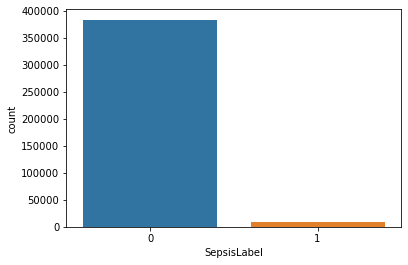

In [9]:
sns.countplot(x='SepsisLabel',data=data)
plt.show()

<h1><b>Data pre-processing
    </h1></b>

<h2><b>Handling Imbalancedness
    </h2></b>

<h2><b>Createing Synthetic Data points for the Minority Class</h2></b>

In [12]:
positive_data=data[data.SepsisLabel==1]
negative_data=data[data.SepsisLabel==0]

In [13]:
upsampled=resample(positive_data,replace=True,n_samples=negative_data.shape[0])

In [14]:
upsampled.shape

(383049, 41)

In [15]:
upsampled_data=pd.concat([negative_data,upsampled])

In [16]:
upsampled_data.shape

(766098, 41)

In [17]:
upsampled_data.value_counts('SepsisLabel')

SepsisLabel
0    383049
1    383049
dtype: int64

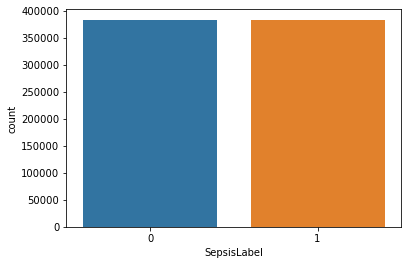

In [18]:
sns.countplot(x='SepsisLabel',data=upsampled_data)
plt.show()

In [19]:
upsampled_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,1,0
1,79.0,100.0,NaN,138.0,101.0,77.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,2,0
2,88.0,100.0,NaN,130.0,97.0,75.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,3,0
3,94.0,99.0,36.11,136.0,101.0,79.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,4,0
4,74.0,99.0,NaN,119.0,88.0,66.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,5,0


<h2><b>Handling Missing Values</h2></b>

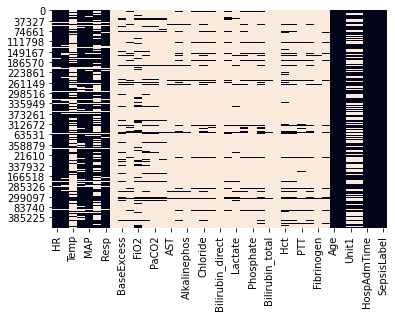

In [18]:
sns.heatmap(upsampled_data.isnull(), cbar=False)
plt.show()

In [20]:
missing = (upsampled_data.isnull().sum() / upsampled_data.shape[0]) * 100
missing

HR                    7.317341
O2Sat                11.171417
Temp                 67.021974
SBP                  16.637819
MAP                   9.419160
DBP                  44.476294
Resp                  8.977180
EtCO2               100.000000
BaseExcess           86.604977
HCO3                 91.136251
FiO2                 80.778177
pH                   85.829881
PaCO2                88.896721
SaO2                 94.354247
AST                  97.837875
BUN                  91.073335
Alkalinephos         97.862023
Calcium              94.248647
Chloride             90.909779
Creatinine           92.843083
Bilirubin_direct     99.814254
Glucose              87.549635
Lactate              94.570799
Magnesium            91.240677
Phosphate            94.129733
Potassium            88.163655
Bilirubin_total      98.251268
TroponinI            99.896488
Hct                  87.987177
Hgb                  90.555516
PTT                  94.658908
WBC                  91.992408
Fibrinog

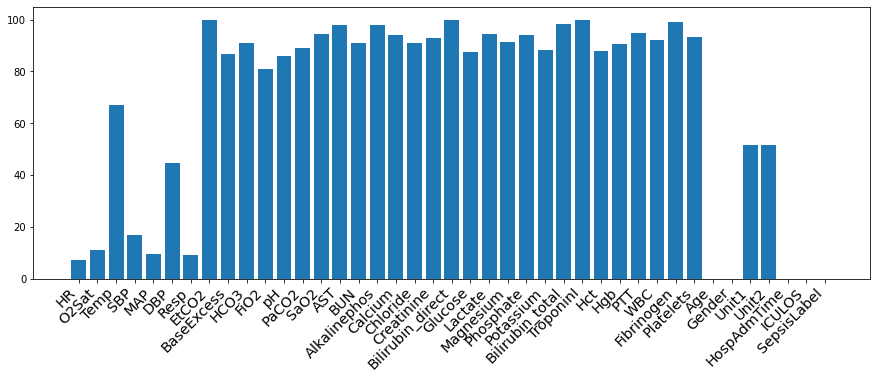

In [21]:
plt.figure(figsize=(15,5))
plt.bar(upsampled_data.columns,height=list(missing))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [22]:
selected_cols = list(missing[missing < 90].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'FiO2',
 'pH',
 'PaCO2',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [23]:
filtered_data = upsampled_data[selected_cols]

In [24]:
filtered_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,1,0
1,79.0,100.0,NaN,138.0,101.0,77.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,2,0
2,88.0,100.0,NaN,130.0,97.0,75.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,3,0
3,94.0,99.0,36.11,136.0,101.0,79.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,4,0
4,74.0,99.0,NaN,119.0,88.0,66.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.73,0,NaN,NaN,-5.03,5,0


<h2><b>Imputing Missing Values</h2></b>

In [25]:
def impute_missing_vals(df, attributes):
    df_clean = df.copy()
    for att in attributes:
        if df_clean[att].isnull().sum() == len(df_clean):
            df_clean[att] = df_clean[att].fillna(0)
        elif df_clean[att].isnull().sum() == len(df_clean) - 1:
            df_clean[att] = df_clean[att].ffill().bfill()
        else:
            df_clean[att] = df_clean[att].interpolate(method='nearest', limit_direction='both')
            df_clean[att] = df_clean[att].ffill().bfill()
    
    return df_clean

In [26]:
imputed_df=impute_missing_vals(filtered_data,filtered_data.columns)

In [27]:
imputed_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,79.0,100.0,36.11,138.0,101.0,77.0,18.0,-3.0,1.0,7.35,...,154.0,3.5,36.1,45.73,0,1.0,0.0,-5.03,1,0
1,79.0,100.0,36.11,138.0,101.0,77.0,18.0,-3.0,1.0,7.35,...,154.0,3.5,36.1,45.73,0,1.0,0.0,-5.03,2,0
2,88.0,100.0,36.11,130.0,97.0,75.0,17.0,-3.0,1.0,7.35,...,154.0,3.5,36.1,45.73,0,1.0,0.0,-5.03,3,0
3,94.0,99.0,36.11,136.0,101.0,79.0,16.0,-3.0,1.0,7.35,...,154.0,3.5,36.1,45.73,0,1.0,0.0,-5.03,4,0
4,74.0,99.0,36.11,119.0,88.0,66.0,13.0,-3.0,1.0,7.35,...,154.0,3.5,36.1,45.73,0,1.0,0.0,-5.03,5,0


<h1><b>EDA</h1></b>

<h2><b>Correlation matrix</h2></b>

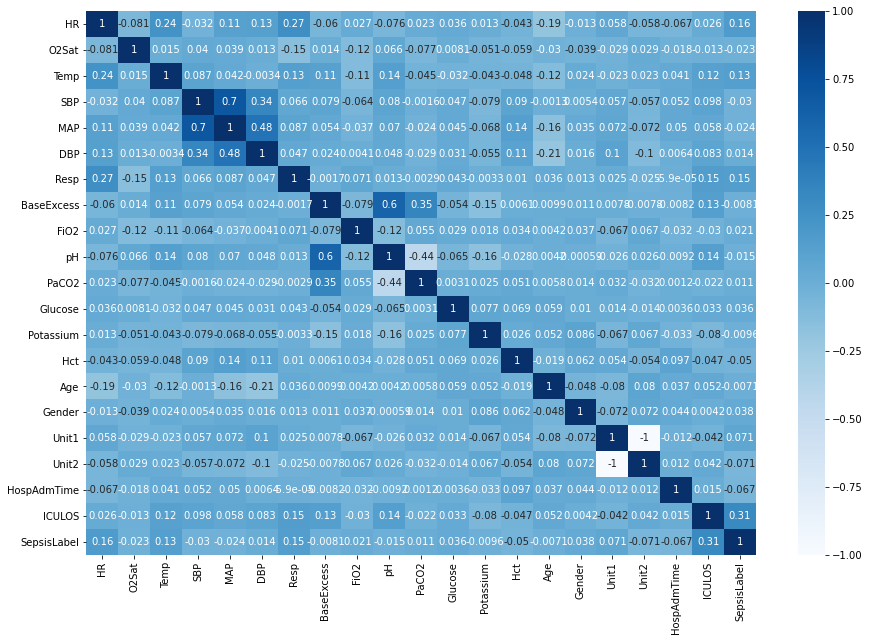

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(imputed_df.corr(),annot=True,cmap="Blues")
plt.show()

<h2><b>Box plots</h2></b>

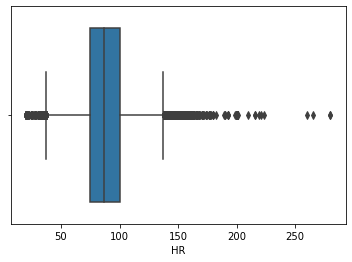

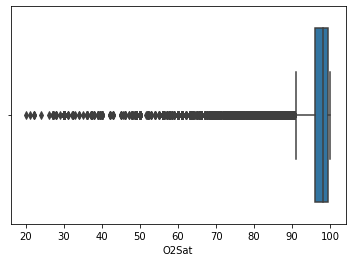

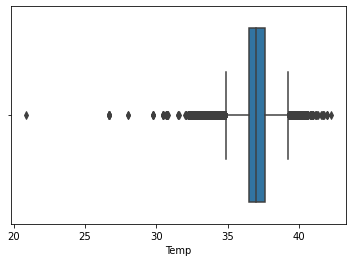

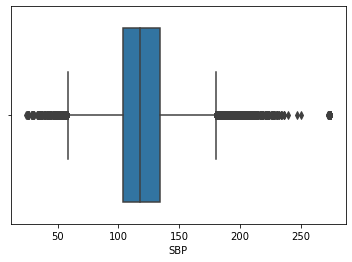

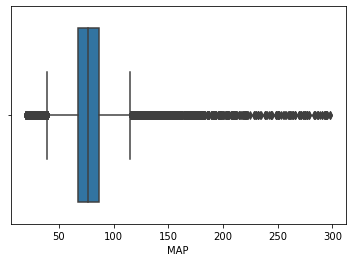

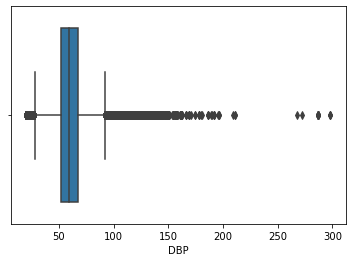

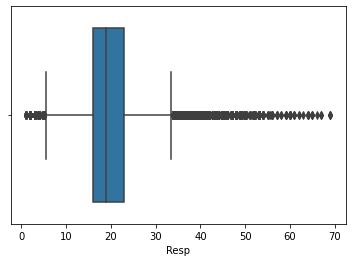

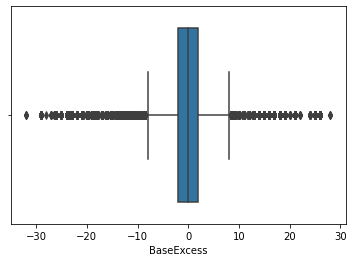

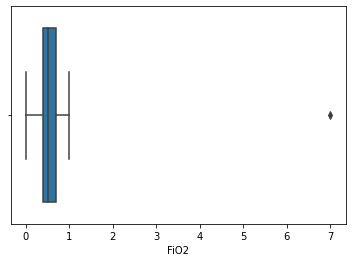

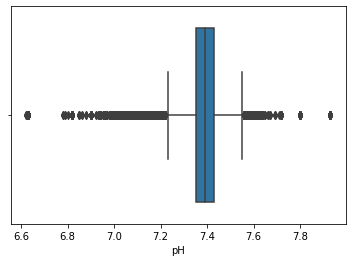

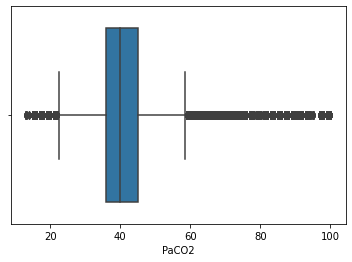

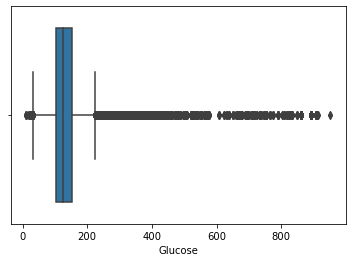

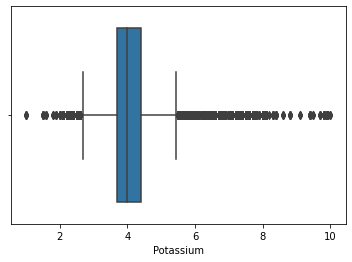

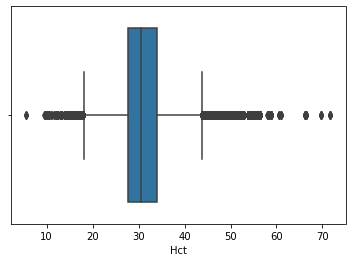

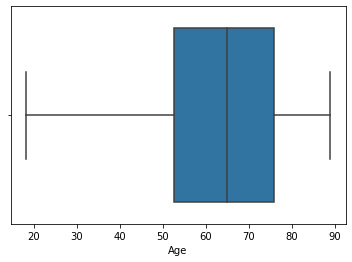

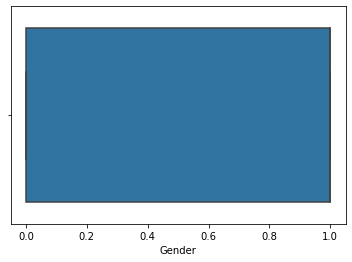

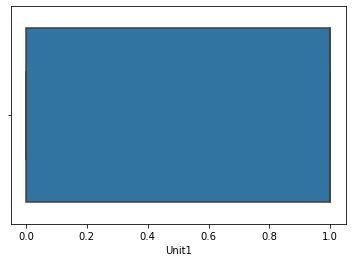

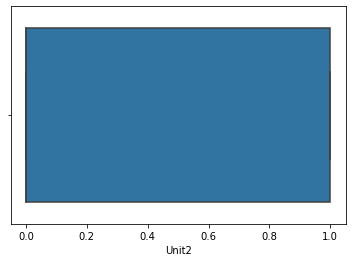

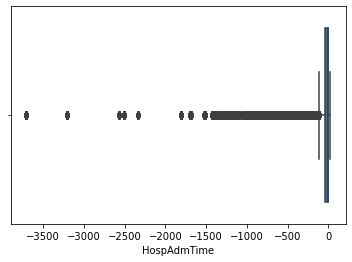

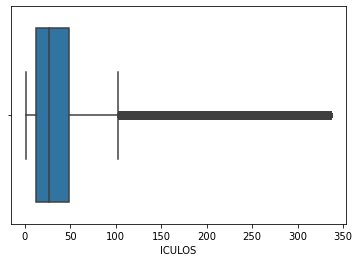

In [28]:
for i in range(imputed_df.shape[1]-1):
  sns.boxplot(imputed_df[list(imputed_df.columns)[i]],orient="v")
  plt.show()

<h2><b>Distributions of each Feature</h2></b>

In [ ]:
for i in range(imputed_df.shape[1]-1):
  sns.kdeplot(imputed_df[list(imputed_df.columns)[i]],shade=True)
  plt.show()

In [31]:
imputed_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'FiO2', 'pH', 'PaCO2', 'Glucose', 'Potassium', 'Hct', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

<h2><b>Feature Engineering</h2></b>

In [28]:
imputed_df.drop(['Unit1','Unit2','HospAdmTime','ICULOS',],axis=1,inplace=True)

In [29]:
imputed_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,PaCO2,Glucose,Potassium,Hct,Age,Gender,SepsisLabel
0,79.0,100.0,36.11,138.0,101.0,77.0,18.0,-3.0,1.0,7.35,39.0,154.0,3.5,36.1,45.73,0,0
1,79.0,100.0,36.11,138.0,101.0,77.0,18.0,-3.0,1.0,7.35,39.0,154.0,3.5,36.1,45.73,0,0
2,88.0,100.0,36.11,130.0,97.0,75.0,17.0,-3.0,1.0,7.35,39.0,154.0,3.5,36.1,45.73,0,0
3,94.0,99.0,36.11,136.0,101.0,79.0,16.0,-3.0,1.0,7.35,39.0,154.0,3.5,36.1,45.73,0,0
4,74.0,99.0,36.11,119.0,88.0,66.0,13.0,-3.0,1.0,7.35,39.0,154.0,3.5,36.1,45.73,0,0


<h1><b>Train-Test Split</h1></b>

In [30]:
x=imputed_df.drop('SepsisLabel',axis=1)
y=imputed_df['SepsisLabel']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(612878, 16)
(153220, 16)
(612878,)
(153220,)


<b><h1>Modelling</b></h1>

<h3>XGBoost Classifier</h3>

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
xgb_clf=XGBClassifier(n_estimators=100,max_depth=6,learning_rate=0.3,objective='binary:logistic',eval_metric='logloss')
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<h3><b>Performance Of Xgboost</h3></b>

In [35]:
y_pred_test_xgb=xgb_clf.predict(x_test)

In [36]:
xgb_precsion=precision_score(y_test,y_pred_test_xgb)
print("XgBoost Precision=",xgb_precsion)

XgBoost Precision= 0.8988567637226631


In [37]:
xgb_recall=recall_score(y_test,y_pred_test_xgb)
print("XgBoost Recall=",xgb_recall)

XgBoost Recall= 0.9195535830831484


In [38]:
xgb_f1=f1_score(y_test,y_pred_test_xgb)
print("XgBoost F1 Score=",xgb_f1)

XgBoost F1 Score= 0.90908738966603


In [39]:
xgb_accuracy=accuracy_score(y_test,y_pred_test_xgb)
print("XgBoost Accuracy=",xgb_accuracy)

XgBoost Accuracy= 0.908040725753818


In [40]:
y_pred_proba_test_xgb=xgb_clf.predict_proba(x_test)

In [62]:
xgb_auc=roc_auc_score(y_test,y_pred_proba_test_xgb[:,1])
print("XgBoost Area Under Curve=",xgb_auc)

XgBoost Area Under Curve= 0.9701994305047625


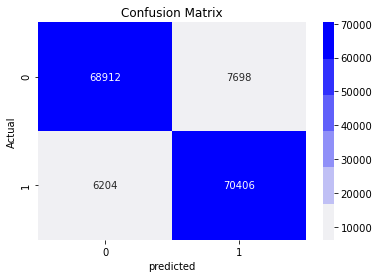

In [63]:
xgb_cm=confusion_matrix(y_test,y_pred_test_xgb)
sns.heatmap(xgb_cm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

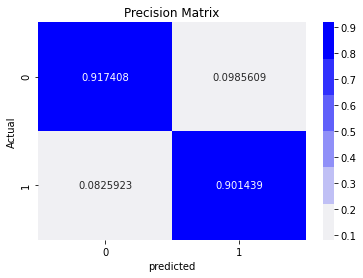

In [64]:
xgb_pm=(xgb_cm/xgb_cm.sum(axis=0))
sns.heatmap(xgb_pm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Precision Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

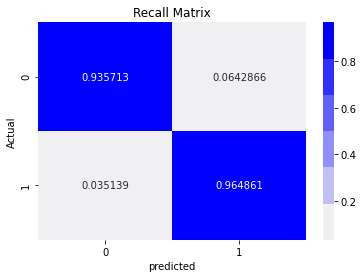

In [47]:
xgb_rm=(((xgb_cm.T)/(xgb_cm.sum(axis=1))).T)
sns.heatmap(xgb_rm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Recall Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

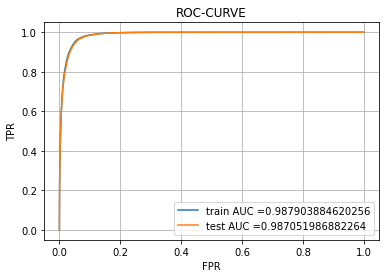

In [48]:
y_pred_proba_train_xgb=xgb_clf.predict_proba(x_train)

#plotting ROC curve
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,y_pred_proba_train_xgb[:,1])
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,y_pred_proba_test_xgb[:,1])

plt.plot(train_fpr,train_tpr,label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-CURVE")
plt.grid()
plt.show()

<h3>GradientBoosting Classifier</h3>

In [ ]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,min_samples_split=2,max_depth=3)
gb_clf.fit(x_train,y_train)

<h3><b>Performance Of Gradient Boosting Classifier</h3></b>

In [ ]:
y_pred_test_gb=gb_clf.predict(x_test)

In [ ]:
gb_precsion=precision_score(y_test,y_pred_test_gb)
print("GradientBoosting Precision=",gb_precsion)

In [ ]:
gb_recall=recall_score(y_test,y_pred_test_gb)
print("GradientBoosting Recall=",gb_recall)

In [ ]:
gb_f1=f1_score(y_test,y_pred_test_gb)
print("GradientBoosting F1 Score=",gb_f1)

In [ ]:
gb_accuracy=accuracy_score(y_test,y_pred_test_gb)
print("GradientBoosting Accuracy=",gb_accuracy)

In [ ]:
y_pred_proba_test_gb=gb_clf.predict_proba(x_test)

In [ ]:
gb_auc=roc_auc_score(y_test,y_pred_proba_test_gb[:,1])
print("GradientBoosting Area Under Curve=",gb_auc)

In [ ]:
gb_cm=confusion_matrix(y_test,y_pred_test_gb)
sns.heatmap(gb_cm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
gb_pm=(gb_cm/gb_cm.sum(axis=0))
sns.heatmap(gb_pm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Precision Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
gb_rm=(((gb_cm.T)/(gb_cm.sum(axis=1))).T)
sns.heatmap(gb_rm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Recall Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred_proba_train_gb=gb_clf.predict_proba(x_train)

#plotting ROC curve
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,y_pred_proba_train_gb[:,1])
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,y_pred_proba_test_gb[:,1])

plt.plot(train_fpr,train_tpr,label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-CURVE")
plt.grid()
plt.show()

<b><h2>Logistic Regression</b></h2>

In [ ]:
lg_clf=SGDClassifier(loss='log')
lg_clf.fit(x_train,y_train)

<h3><b>Performance Of Logistic Regression</h3></b>

In [ ]:
y_pred_test_lg=lg_clf.predict(x_test)

In [ ]:
lg_precsion=precision_score(y_test,y_pred_test_lg)
print("LogisticRegression Precision=",lg_precsion)

In [ ]:
lg_recall=recall_score(y_test,y_pred_test_lg)
print("LogisticRegression Recall=",lg_recall)

In [ ]:
lg_f1=f1_score(y_test,y_pred_test_lg)
print("LogisticRegression F1 Score=",lg_f1)

In [ ]:
lg_accuracy=accuracy_score(y_test,y_pred_test_lg)
print("LogisticRegression Accuracy=",lg_accuracy)

In [ ]:
y_pred_proba_test_lg=lg_clf.predict_proba(x_test)

In [ ]:
lg_auc=roc_auc_score(y_test,y_pred_proba_test_lg[:,1])
print("LogisticRegression Area Under Curve=",lg_auc)

In [ ]:
lg_cm=confusion_matrix(y_test,y_pred_test_lg)
sns.heatmap(lg_cm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
lg_pm=(lg_cm/lg_cm.sum(axis=0))
sns.heatmap(lg_pm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Precision Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
lg_rm=(((lg_cm.T)/(lg_cm.sum(axis=1))).T)
sns.heatmap(lg_rm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Recall Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred_proba_train_lg=lg_clf.predict_proba(x_train)

#plotting ROC curve
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,y_pred_proba_train_lg[:,1])
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,y_pred_proba_test_lg[:,1])

plt.plot(train_fpr,train_tpr,label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-CURVE")
plt.grid()
plt.show()

<b><h2>SupportVector Classifier</b></h2>

In [ ]:
sv_clf=SGDClassifier(loss='hinge')
sv_clf.fit(x_train,y_train)

<h3><b>Performance Of Support Vector Classifier</h3></b>

In [ ]:
y_pred_test_sv=sv_clf.predict(x_test)

In [ ]:
sv_precsion=precision_score(y_test,y_pred_test_sv)
print("SupportVectorClassifier Precision=",sv_precsion)

In [ ]:
sv_recall=recall_score(y_test,y_pred_test_sv)
print("SupportVectorClassifier Recall=",sv_recall)

In [ ]:
sv_f1=f1_score(y_test,y_pred_test_sv)
print("SupportVectorClassifier F1 Score=",sv_f1)

In [ ]:
sv_accuracy=accuracy_score(y_test,y_pred_test_sv)
print("SupportVectorClassifier Accuracy=",sv_accuracy)

In [ ]:
calibrator = CalibratedClassifierCV(sv_clf, cv='prefit')
model=calibrator.fit(x_train,y_train)

y_pred_proba_train_sv=  model.predict_proba(x_train)
y_pred_proba_test_sv = model.predict_proba(x_test)

In [ ]:
sv_auc=roc_auc_score(y_test,y_pred_proba_test_sv[:,1])
print("SupportVectorClassifier Area Under Curve=",sv_auc)

In [ ]:
sv_cm=confusion_matrix(y_test,y_pred_test_sv)
sns.heatmap(sv_cm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
sv_pm=(sv_cm/sv_cm.sum(axis=0))
sns.heatmap(sv_pm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Precision Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
sv_rm=(((dt_cm.T)/(sv_cm.sum(axis=1))).T)
sns.heatmap(sv_rm,cmap=sns.light_palette("blue"),annot=True,fmt='g')
plt.title("Recall Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#plotting ROC curve
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,y_pred_proba_train_sv[:,1])
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,y_pred_proba_test_sv[:,1])

plt.plot(train_fpr,train_tpr,label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-CURVE")
plt.grid()
plt.show()

<b><h1>Deep Learning Architechture</b></h1>

<h2><b>Multi Layer Perceptron Using TensorFlow Keras API</h2></b>

 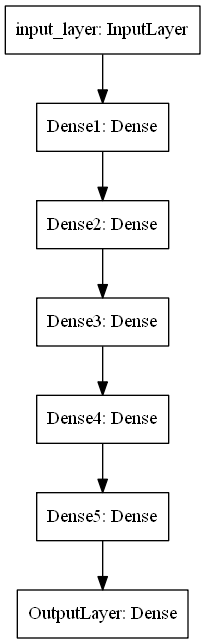

<b>Activation Function-</b> Rectified Linear Units(ReLu)<br>
<b>Activation Function For Output Layer-</b>  Sigmoid unit<br>
<b>Weights Initializer-</b>  He Uniform<br>
<b>Optimizer-</b>  Adam<br>

In [ ]:
%load_ext tensorboard

In [ ]:
#clearing previous logs|
!rm -rf ./model_logs/ 

In [ ]:
y_train.shape

In [ ]:
model=Sequential()
#input layer
model.add(InputLayer(x_train.shape[1],))

#hidden layers
model.add(Dense(50,activation='tanh',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dense(40,activation='tanh',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dense(30,activation='tanh',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dense(20,activation='tanh',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.he_uniform()))

#output layer
model.add(Dense(1,activation='sigmoid',kernel_initializer=tf.keras.initializers.he_uniform()))

#defining optimizer
optimizer=tf.keras.optimizers.Adam()

log_dir="model_logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy','Recall'])
model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test),callbacks=[tensorboard])

In [ ]:
model.summary()

In [ ]:
%tensorboard --logdir model_logs/fit

In [41]:
pickle_out=open("classifier.pkl","wb")
pickle.dump(xgb_clf,pickle_out)
pickle_out.close()